In [1]:
import pandas as pd
import numpy as np

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 影院加票房的排序

In [2]:
sort_box = pd.read_csv("E:/MoiveData/sort_box_office.csv",encoding='gbk')

In [3]:
sort_box[:2]
sort_box.size

34956

In [4]:
sort1 = sort_box.drop(['MovieID','MovieEName','MovieType','MovieLength','MovieStandard','MovieAvgPrice','MovieAvgPeople','MovieWomIndex','Remark'],axis = 1)
sort = sort1[:20000]
#sort

In [5]:
cinema_box = {}
for _,row in sort1.iterrows():
    movie_name = row["MovieCName"]
    box = row["MovieSumBoxOffice"]
    cinema_box[movie_name] = box

In [33]:
num = 1000
plt.plot(sort[:num]['MovieSumBoxOffice'])
plt.yticks([i*0.5*10e8for i in range(10)])
plt.show()

AttributeError: 'module' object has no attribute 'barplot'

## BarLine 

In [54]:
from pyecharts import Bar, Line, Overlap

attr = [row["MovieCName"] for _,row in sort.iterrows()]
v1 = [cinema_box[row["MovieCName"]] for _,row in sort.iterrows()]
v2 = [cinema_box[row["MovieCName"]] for _,row in sort.iterrows()]
bar = Bar("票房前10的电影")
bar.add("bar", attr, v1)
line = Line()
line.add("line", attr, v1)

overlap = Overlap()
overlap.add(bar)
overlap.add(line)
overlap.render('barline.html')

## 可以移动数据条的条形图数据

In [6]:
import random
from pyecharts import Bar

#attr = ["{}天".format(i) for i in range(30)]
#v1 = [random.randint(1, 30) for _ in range(30)]

x = [row["MovieCName"] for _,row in sort.iterrows()]
y = [cinema_box[row["MovieCName"]] / 1e4 for _,row in sort.iterrows()] 
bar = Bar("2017年X月-X月电影票房整体数据统计（万）")
bar.add("", x, y, is_datazoom_show=True,datazoom_range=[500, 6000],ylable = "aaa")# is_label_show=True,
bar.render('CinemaSumBox.html')

## 3D数据图，x，y是axis，z是data。

In [18]:

from pyecharts import Bar3D

bar3d = Bar3D("3D 影院数据分析", width=1200, height=600)
x_axis = [row["MovieCName"] for _,row in sort.iterrows()]
y_axis = [row["MovieReleaseTime"] for _,row in sort.iterrows()]
data = [cinema_box[row["MovieCName"]] for _,row in sort.iterrows()]
range_color = ['#313695', '#4575b4', '#74add1', '#abd9e9', '#e0f3f8', '#ffffbf',
               '#fee090', '#fdae61', '#f46d43', '#d73027', '#a50026']
bar3d.add("", x_axis, y_axis, data ,
          is_visualmap=True,
          visual_range=[100000000,600000000], 
          visual_range_color=range_color, grid3d_width=200, grid3d_depth=80)
bar3d.render('aaa.html')

## 普通的条形图

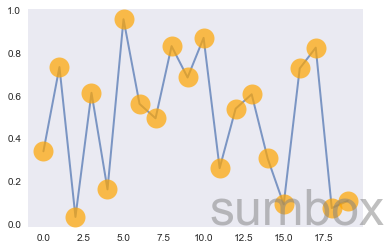

In [87]:
#series = sort['MovieCName'].
fig, ax = plt.subplots()
ax.plot(np.random.rand(20), '-o', ms=20, lw=2, alpha=0.7, mfc='orange')
ax.grid()

# position bottom right
fig.text(0.95, 0.1, 'sumbox',
         fontsize=50, color='gray',
         ha='right', va='bottom', alpha=0.5)

plt.show()

## 气泡图scatter需要参数都是数据
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(sort['MovieSumBoxOffice'],sort['MovieCName'],s=sort['MovieSumBoxOffice']) XXX
plt.show()

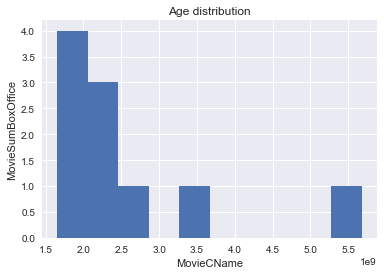

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = [row["MovieCName"] for _,row in sort.iterrows()]
y = [cinema_box[row["MovieCName"]] for _,row in sort.iterrows()]
y = np.array(y)
ax.hist(y, bins=10)
plt.title('Age distribution')
plt.xlabel('MovieCName')
plt.ylabel('MovieSumBoxOffice')
plt.show()

In [7]:
director = pd.read_csv("E:/MoiveData/sort_director_SumBoxOffice.csv",encoding='gbk')

In [8]:
#1961
director[:2]

,ActorID,ActorSumBoxOffice,ActorCName
0,6060.0,4.639100e+09,周星驰
1,73010.0,4.600650e+09,迈克尔·贝


# 可以实现中文标签的绘图

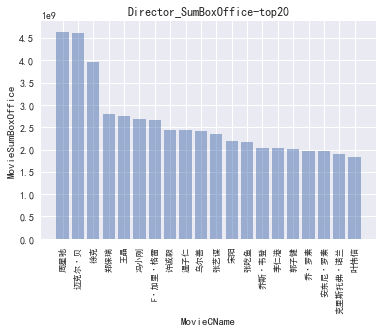

In [11]:
num = 20
plt.bar(range(num),director[:num]['ActorSumBoxOffice'], tick_label=director[:num]['ActorCName'],
        width = 0.8,align='center',alpha=0.5)
plt.yticks([i*0.5*10e8for i in range(10)])
plt.xticks(size='small',rotation=90)
plt.title('Director_SumBoxOffice-top20')
plt.xlabel('MovieCName')
plt.ylabel('MovieSumBoxOffice')
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#plt.xlim(0,4.0) # x的范围
#plt.grid()# 网格线
plt.show()

In [16]:
actor = pd.read_csv("E:/MoiveData/sort_actor_SumBoxOffice.csv",encoding='gbk')
actor1 = actor[:10]
actor1

,ActorID,ActorSumBoxOffice,ActorCName
0,5302,11853137000,邓超
1,2577,9449127000,曾志伟
2,1168,8950024000,成龙
3,8448,8946867000,吴京
4,2201375,8647264000,吴亦凡
5,199112,8517745000,范·迪塞尔
6,2414,8427197000,余男
7,95644,8386152000,泰瑞斯·吉布森
8,48984,8096302000,斯坦·李
9,3341,7948453000,黄渤


In [17]:
actor_box = {}

for _,row in actor1.iterrows():
    name = row["ActorCName"]
    D_box = row["ActorSumBoxOffice"]
    actor_box[name] = D_box

### top10演员票房

In [18]:
from pyecharts import Bar, Line, Overlap

attr = [row["ActorCName"] for _,row in actor1.iterrows()]
v1 = [actor_box[row["ActorCName"]]/1e4 for _,row in actor1.iterrows()]
#v2 = [director_box[row["ActorCName"]] for _,row in sort.iterrows()]
bar = Bar("票房前10的演员(万)")
bar.add("bar", attr, v1)
line = Line()
line.add("line", attr, v1)

overlap = Overlap()
overlap.add(bar)
overlap.add(line)
overlap.render('barline2.html')

### top100演员票房

In [15]:
import random
from pyecharts import Bar

#attr = ["{}天".format(i) for i in range(30)]
#v1 = [random.randint(1, 30) for _ in range(30)]

x = [row["ActorCName"] for _,row in actor1.iterrows()]
y = [actor_box[row["ActorCName"]]/1e4 for _,row in actor1.iterrows()]
bar = Bar("演员电影票房数据统计top100（万）")
bar.add("", x, y,  is_datazoom_show=True,datazoom_range=[500000000, 6000000000])#is_label_show=True,
bar.render('CinemaSumBox2.html')

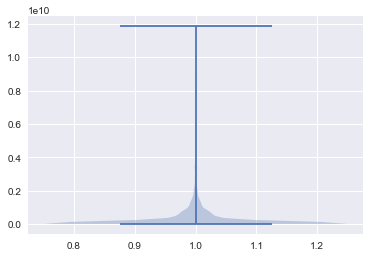

In [130]:
plt.violinplot(actor['ActorSumBoxOffice'])
plt.show()

## 关系气泡图

In [134]:
guanxi = pd.read_csv("E:/MoiveData/network_actor_weight_with_cname_no_id.csv",encoding='gbk')

In [136]:
guanxi[:2]

,Index,ActorCname_1,ActorCname_2,weight
0,0,何炅,杜海涛,9
1,1,吴君如,郑中基,8


In [161]:
from pyecharts import Pie

attr = ["动作", "战争", "军事", "喜剧", "爱情", "科幻", "怀旧", "犯罪", "奇幻", "运动", 
        "冒险", "惊悚", "动画", "青春", "剧情", "传记", "公路", "悬疑", "灾难", "亲情", 
        "穿越", "古装", "贺岁", "真人秀", "综艺大电影", "警匪", "文艺", "动物", "励志", "友情", 
        "玄幻", "儿童", "职场", "歌舞", "音乐", "革命", "武侠", "心理", "西部", "恐怖", 
        "侦探", "纪录片", "黑色幽默", "舞台艺术片", "戏曲", "女性"]
v1 = [560, 118, 8, 694, 778, 143, 18, 156, 107, 28, 
      331, 372, 316, 84, 558, 71, 9, 274, 22, 34, 
      4, 56, 3, 4, 2, 17, 7, 5, 42, 11, 
      4, 69, 9, 23, 23, 8, 22, 2, 4, 116, 
      4, 79, 1, 19, 9, 2]
pie = Pie("饼图示例")
pie.add("", attr, v1,is_label_show=True,)
pie.render('type_movie.html')

In [150]:
pie.add??
